In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df1 = pd.read_csv("cloud_results/CNN/advanced_cnn_results1.csv")
df2 = pd.read_csv("cloud_results/CNN/advanced_cnn_results2.csv")

df = pd.concat([df1, df2], axis=0)

df.reset_index(drop=True, inplace=True)

In [ ]:
# Read df here if you want:
# df = pd.read_parquet(...)

In [39]:
#pd.set_option('display.max_rows', df.shape[0]+1)
df

fda_name  theta dataset_name  input_pixels  n_train  num_weights  seed  \
0      naive    1.0       EMNIST           784    60000      2592202     7   
1     linear    1.0       EMNIST           784    60000      2592202     7   
2     sketch    1.0       EMNIST           784    60000      2592202     7   
3      naive    2.5       EMNIST           784    60000      2592202     7   
4     linear    2.5       EMNIST           784    60000      2592202     7   
..       ...    ...          ...           ...      ...          ...   ...   
139   linear    5.0       EMNIST           784    60000      2592202     7   
140   sketch    5.0       EMNIST           784    60000      2592202     7   
141    naive   10.0       EMNIST           784    60000      2592202     7   
142   linear   10.0       EMNIST           784    60000      2592202     7   
143   sketch   10.0       EMNIST           784    60000      2592202     7   

     epochs  num_clients  batch_size  ...  model_bytes  local_state_bytes  \
0         1            5          32  ...     10368808                  4   
1         1            5          32  ...     10368808                  8   
2         1            5          32  ...     10368808              47604   
3         1            5          32  ...     10368808                  4   
4         1            5          32  ...     10368808                  8   
..      ...          ...         ...  ...          ...                ...   
139      10           10         128  ...     10368808                  8   
140      10           10         128  ...     10368808              47604   
141      10           10         128  ...     10368808                  4   
142      10           10         128  ...     10368808                  8   
143      10           10         128  ...     10368808              47604   

     final_accuracy  total_fda_steps  total_steps  total_rounds  \
0            0.9489              375          375            73   
1            0.9533              375          375            74   
2            0.9618              375          375            62   
3            0.9465              375          375            44   
4            0.9636              375          375            46   
..              ...              ...          ...           ...   
139          0.9847              460          460            34   
140          0.9828              460          460            29   
141          0.9832              460          460            28   
142          0.9851              460          460            27   
143          0.9858              460          460            25   

     model_bytes_exchanged  monitoring_bytes_exchanged  \
0               7569229840                        7500   
1               7672917920                       15000   
2               6428660960                    89257500   
3               4562275520                        7500   
4               4769651680                       15000   
..                     ...                         ...   
139             7050789440                       36800   
140             6013908640                   218978400   
141             5806532480                       18400   
142             5599156320                       36800   
143             5184404000                   218978400   

     total_communication_bytes  trained_in_bytes  
0                   7569237340         188400000  
1                   7672932920         188400000  
2                   6517918460         188400000  
3                   4562283020         188400000  
4                   4769666680         188400000  
..                         ...               ...  
139                 7050826240        1848832000  
140                 6232887040        1848832000  
141                 5806550880        1848832000  
142                 5599193120        1848832000  
143                 5403382400        1848832000  

[144 rows x 25 columns]

In [40]:
# Define styles for each fda_name
fda_styles = {
    'naive': 'o-r',
    'linear': 's-g',
    'sketch': '^-b'
}

# Client Plots

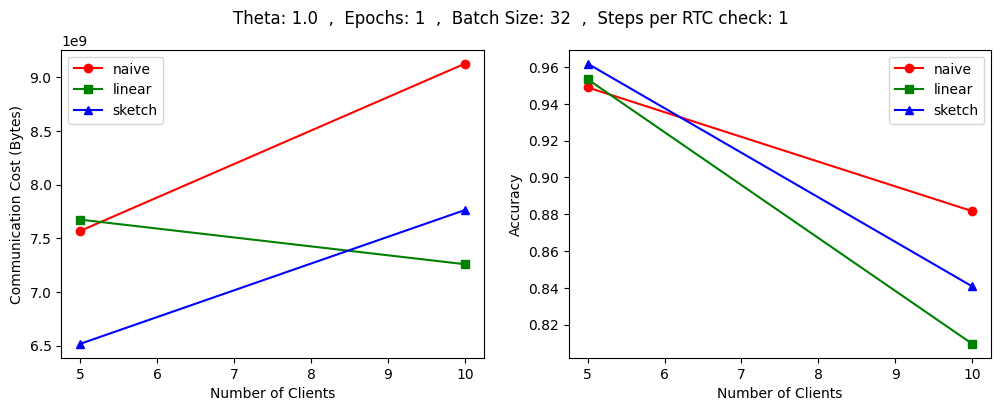

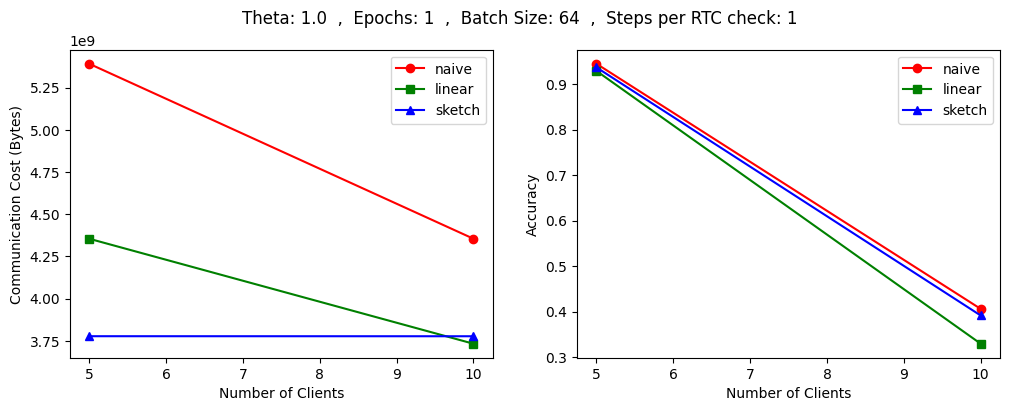

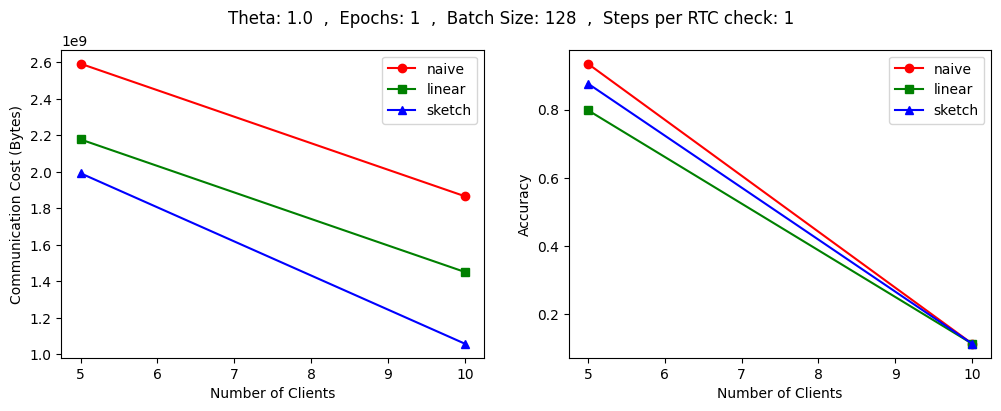

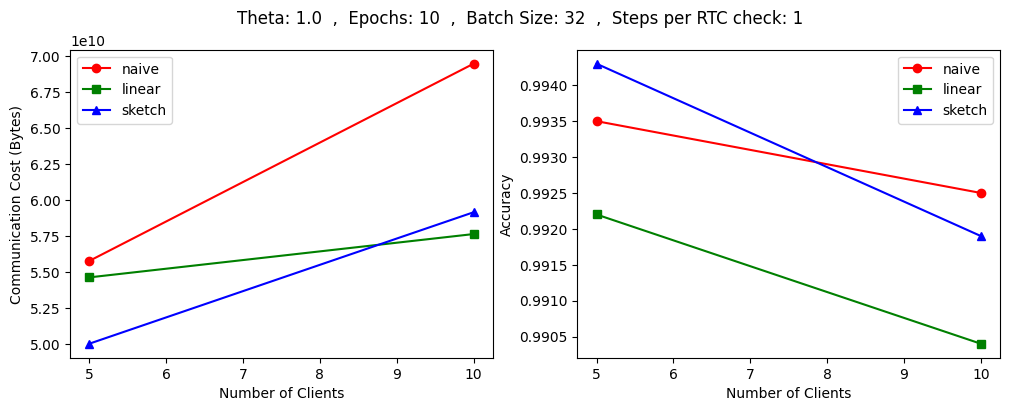

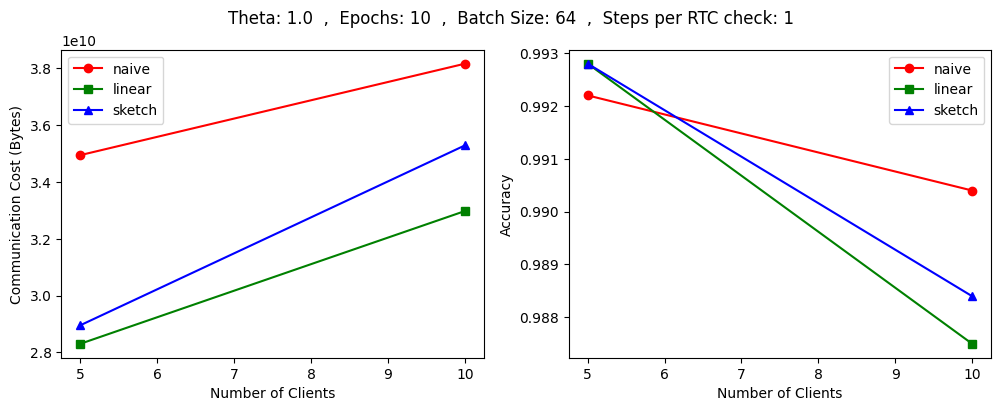

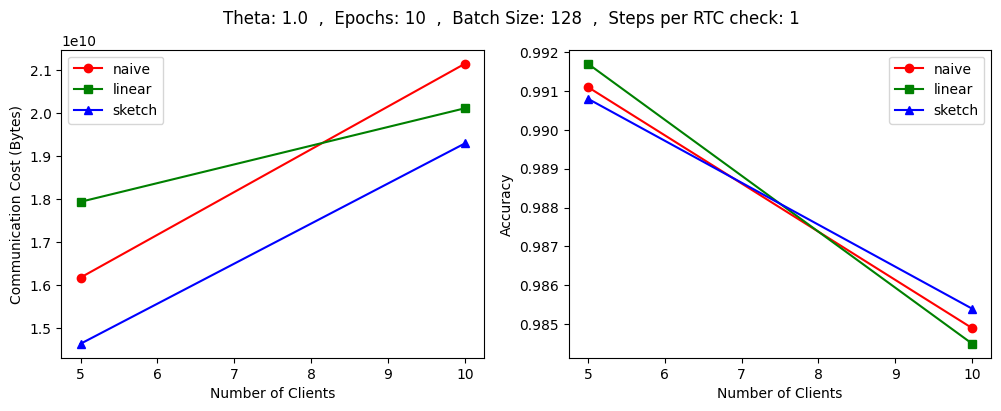

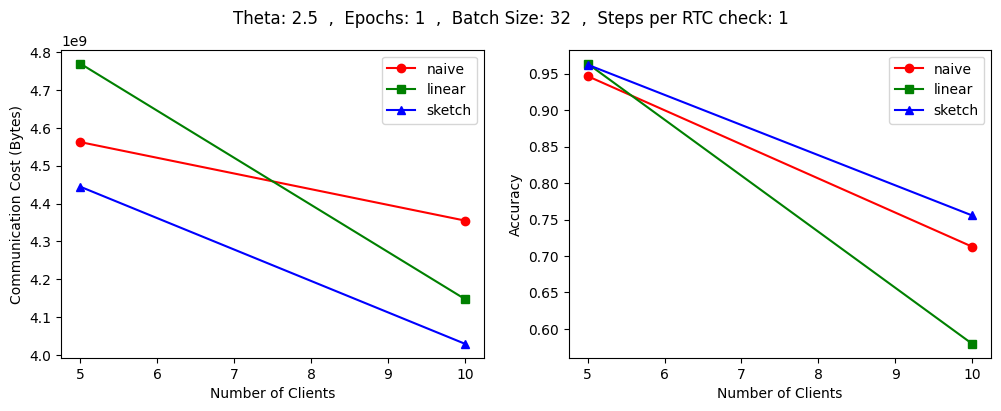

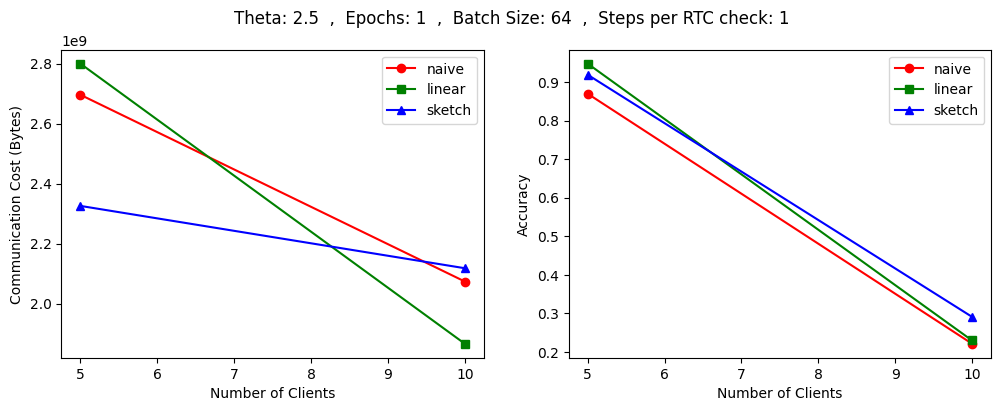

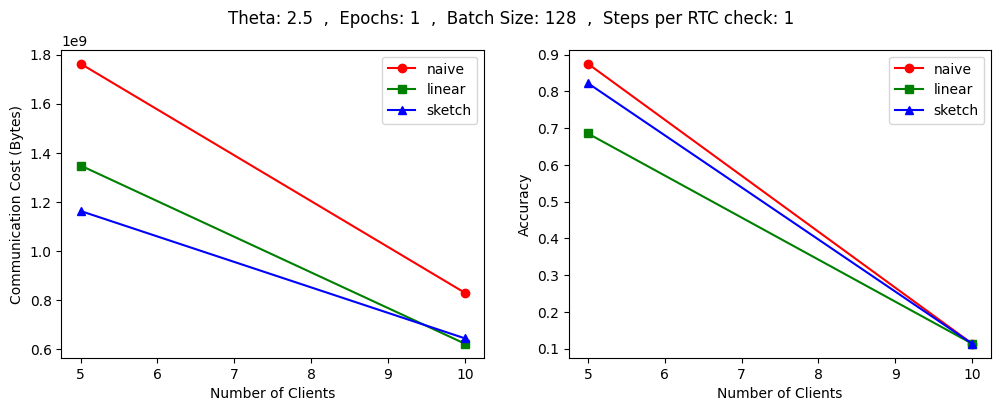

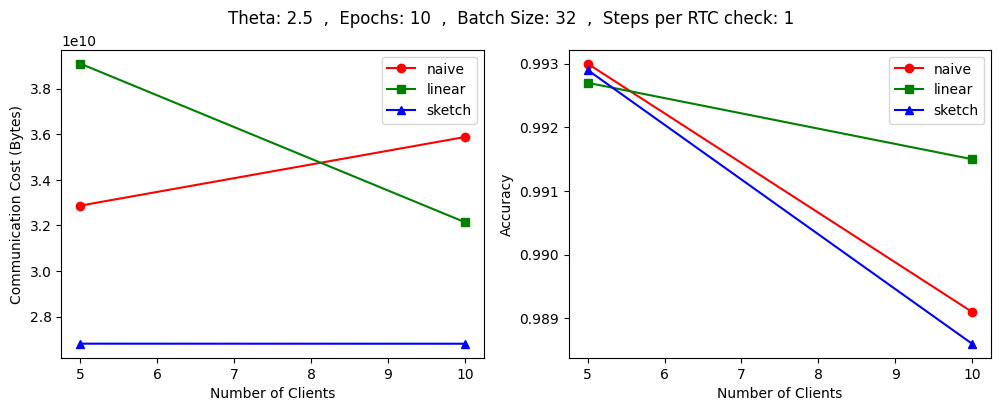

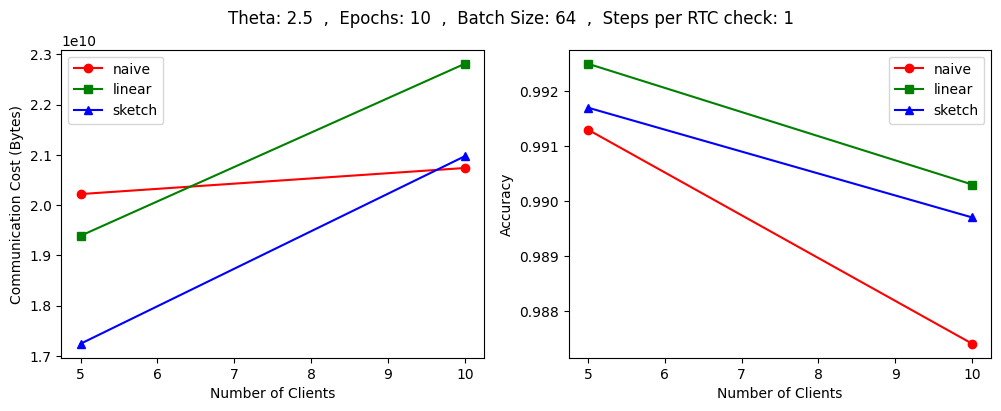

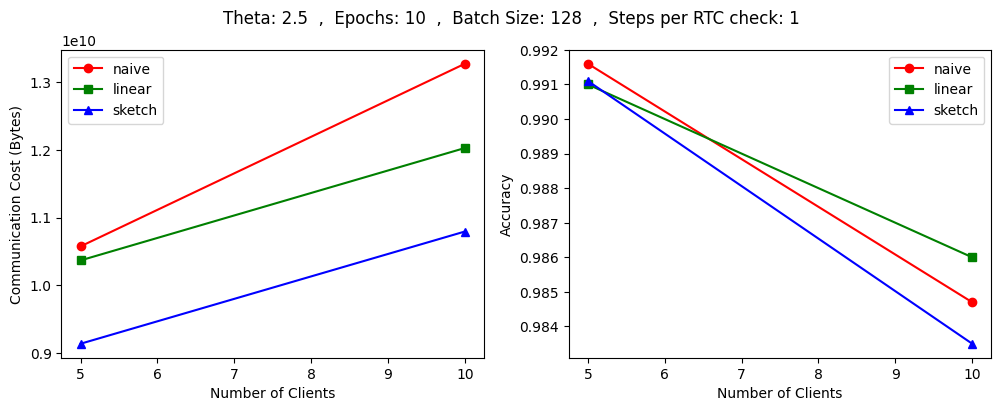

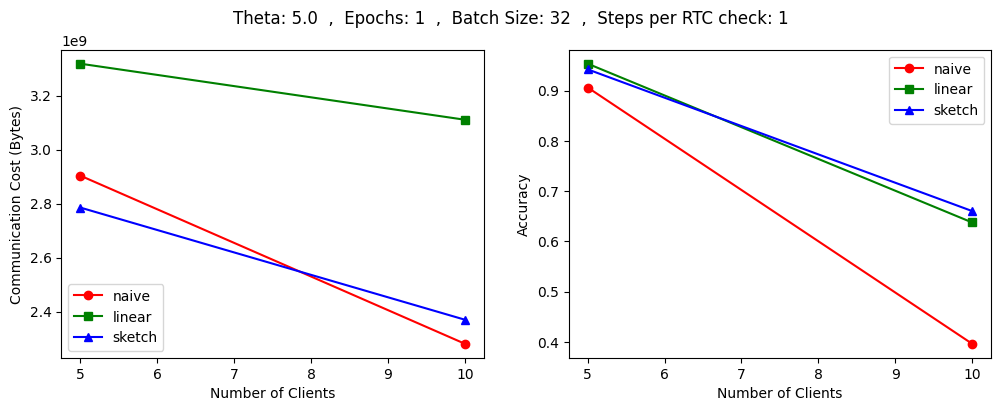

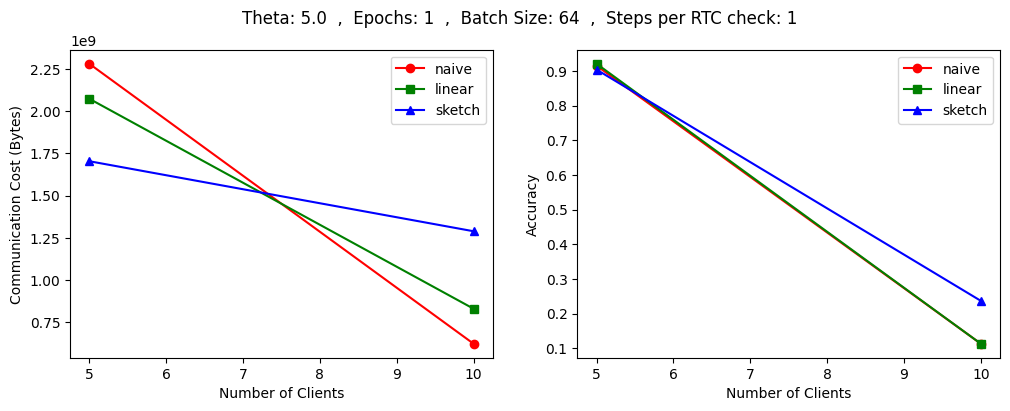

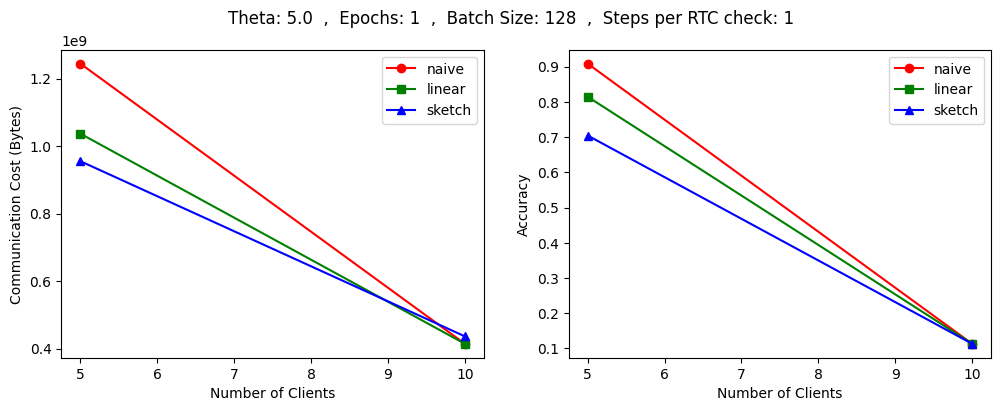

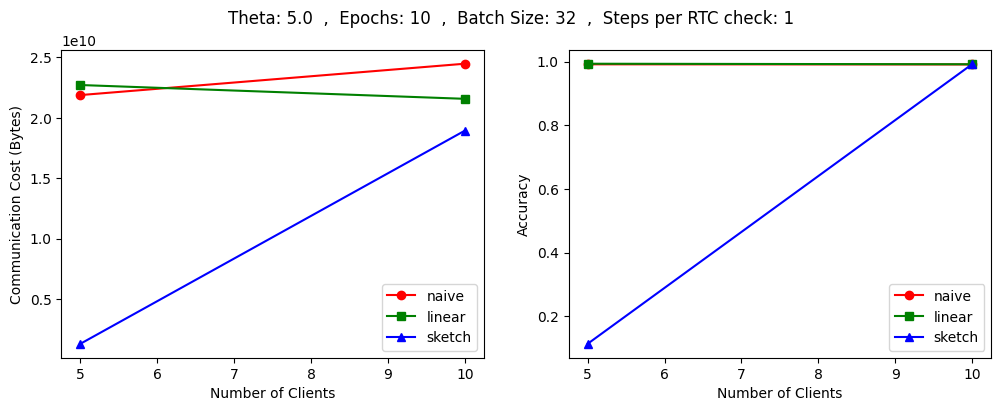

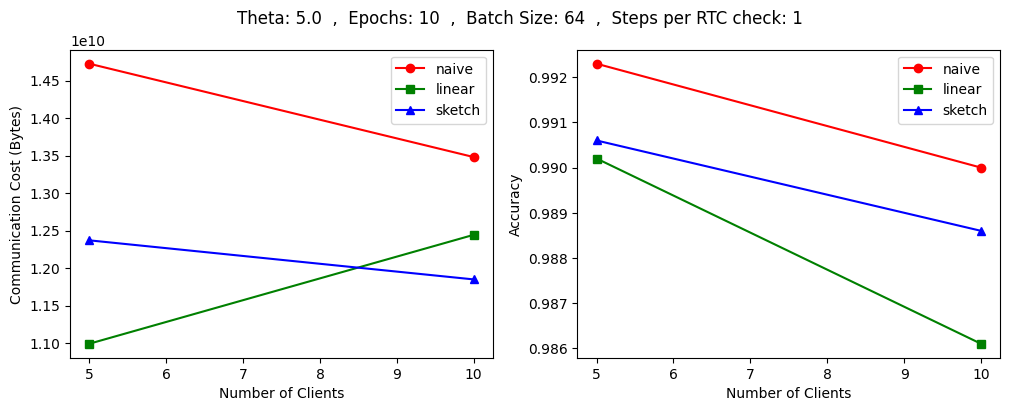

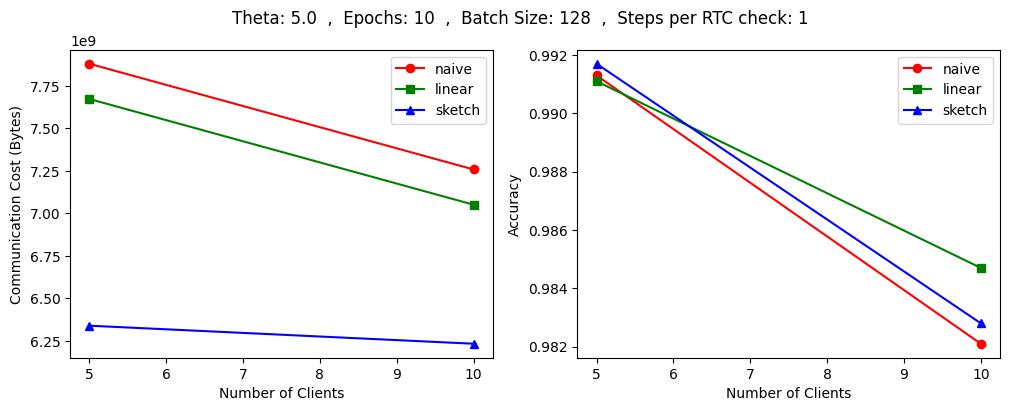

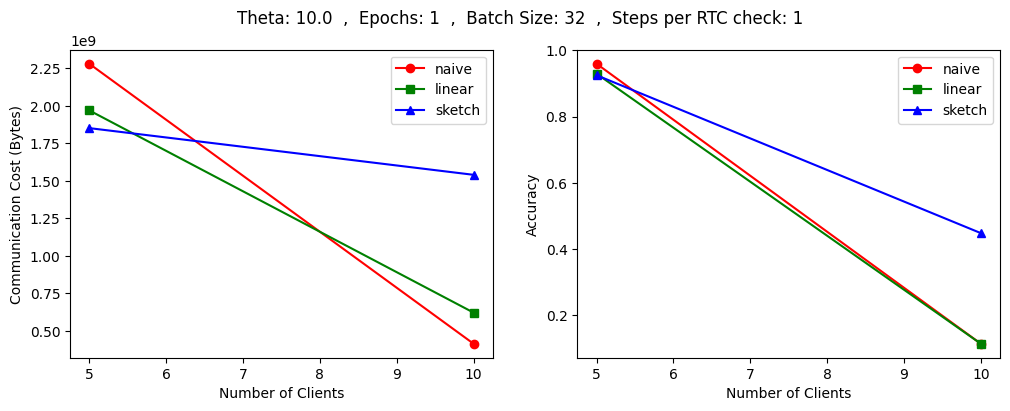

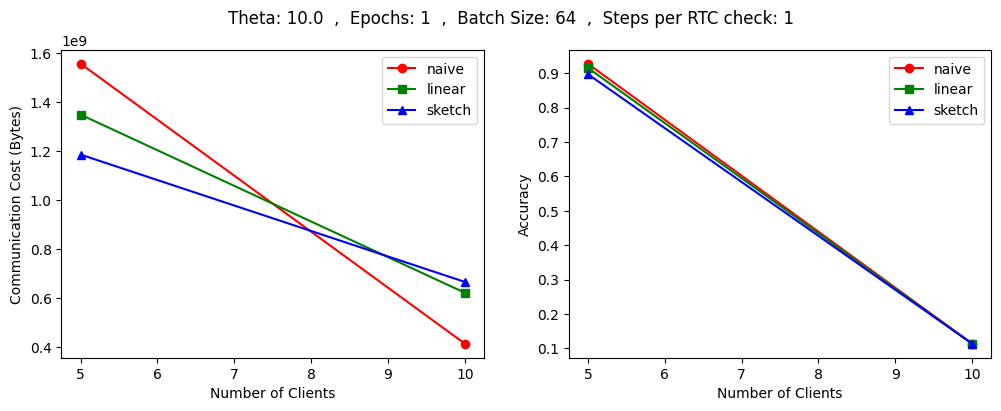

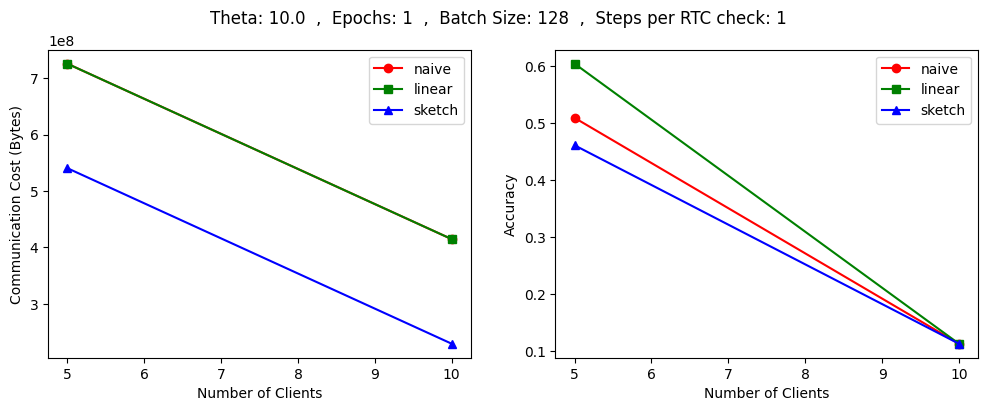

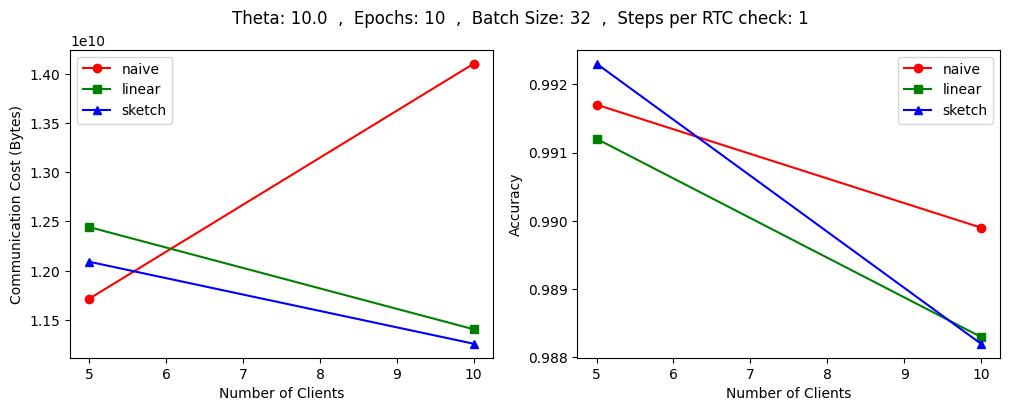

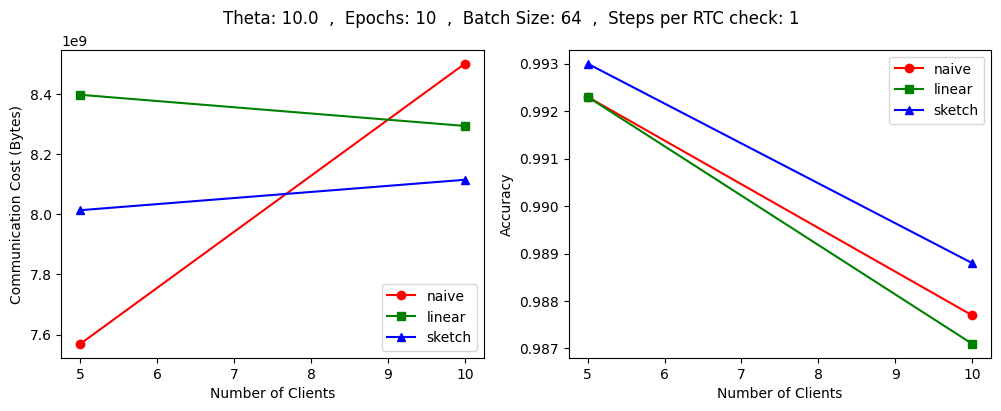

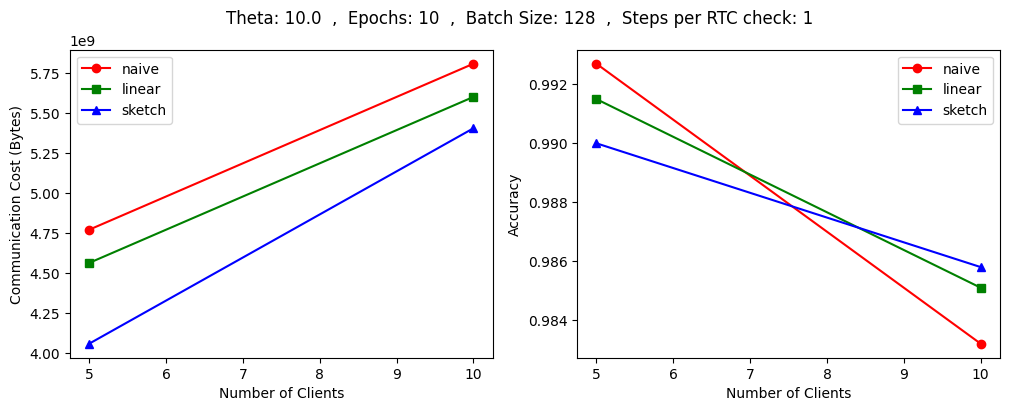

In [42]:
# Get unique values for each parameter
theta = df['theta'].unique()
batch_size_values = df['batch_size'].unique()
epochs_values = df['epochs'].unique()
steps_in_one_fda_step_values = df['steps_in_one_fda_step'].unique()
fda_names = df['fda_name'].unique()

# Loop through all unique combinations of num_clients, batch_size, epochs, and steps_in_one_fda_step
for theta in theta_values:
    for epochs in epochs_values:
        for batch_size in batch_size_values:
            for steps_in_one_fda_step in steps_in_one_fda_step_values:
                # Filter the data for the current combination
                filtered_data = df[(df['theta'] == theta) &
                                   (df['batch_size'] == batch_size) &
                                   (df['epochs'] == epochs) &
                                   (df['steps_in_one_fda_step'] == steps_in_one_fda_step)]

                # Create subplots
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

                # Plot the first graph (total_communication_bytes)
                for fda_name in filtered_data['fda_name'].unique():
                    fda_filtered_data = filtered_data[filtered_data['fda_name'] == fda_name]
                    ax1.plot(fda_filtered_data['num_clients'], fda_filtered_data['total_communication_bytes'],
                             fda_styles[fda_name], label=fda_name)

                ax1.set_xlabel('Number of Clients')
                ax1.set_ylabel('Communication Cost (Bytes)')
                ax1.legend()

                # Plot the second graph (final_accuracy)
                for fda_name in filtered_data['fda_name'].unique():
                    fda_filtered_data = filtered_data[filtered_data['fda_name'] == fda_name]
                    ax2.plot(fda_filtered_data['num_clients'], fda_filtered_data['final_accuracy'],
                             fda_styles[fda_name], label=fda_name)

                # Add a single title for the entire figure
                title = f'Theta: {theta}  ,  Epochs: {epochs}  ,  Batch Size: {batch_size}  ,  Steps per RTC check: {steps_in_one_fda_step}'
                fig.suptitle(title)
                ax2.set_xlabel('Number of Clients')
                ax2.set_ylabel('Accuracy')
                ax2.legend()

                # Show the plot
                plt.show()

# Theta plots

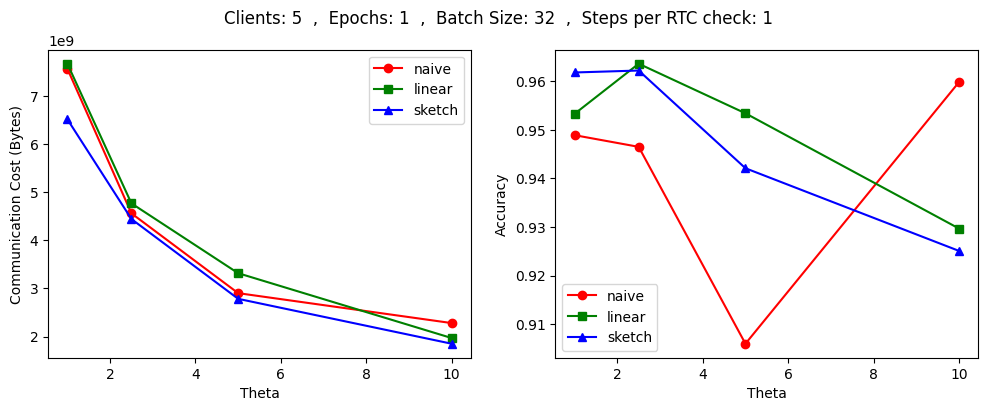

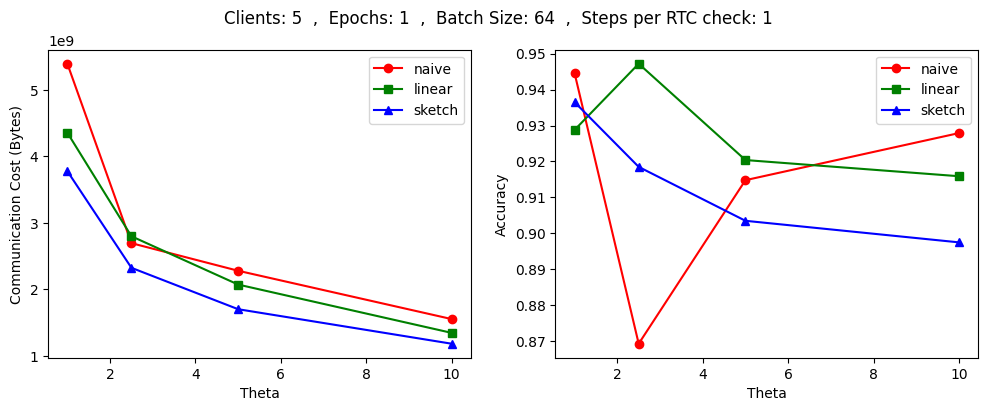

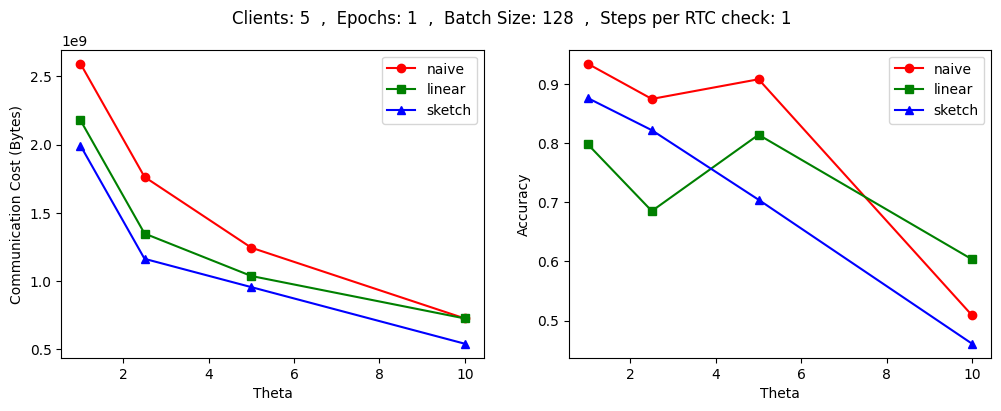

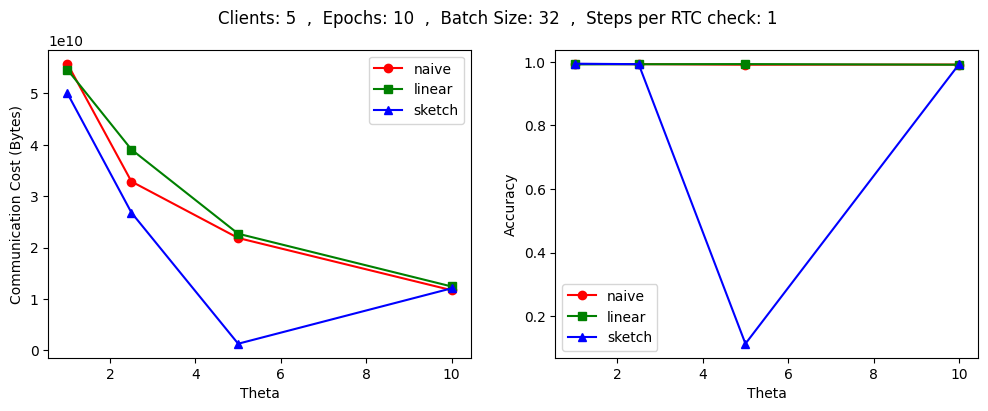

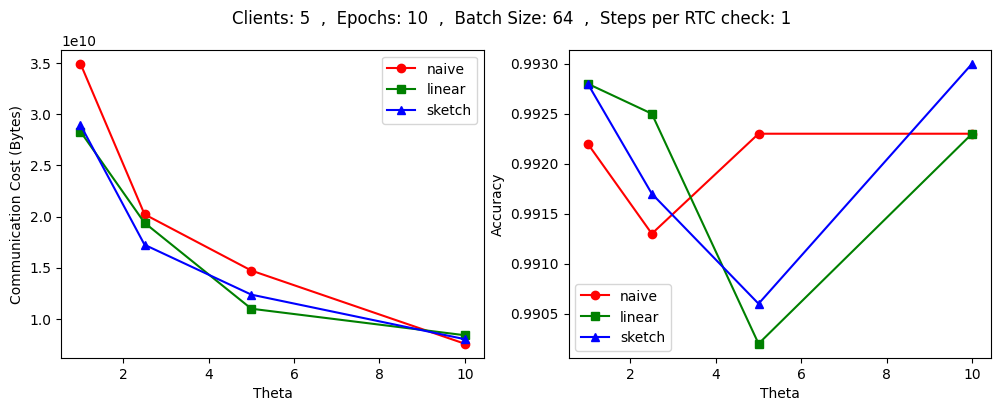

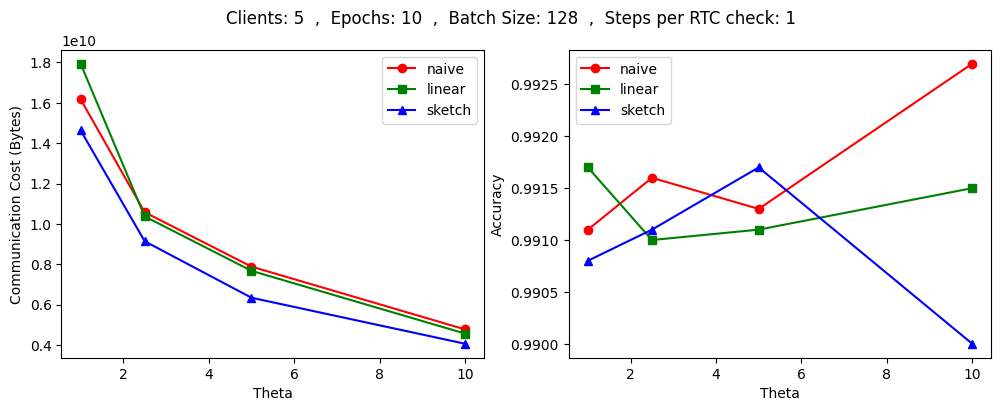

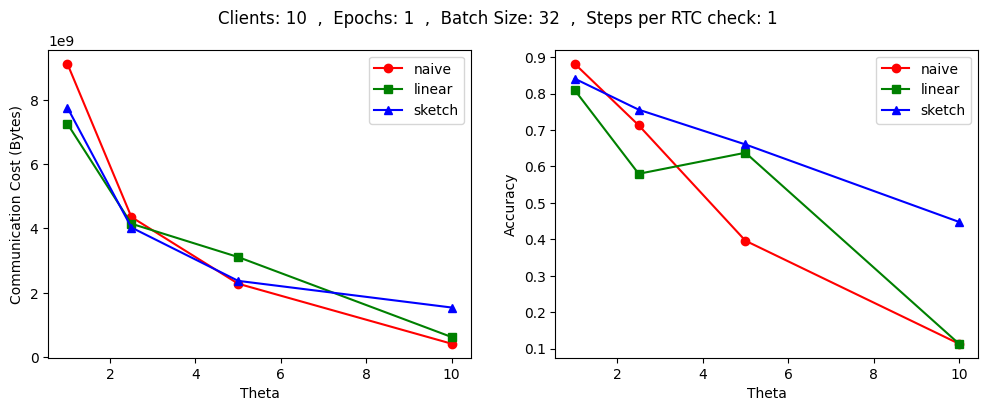

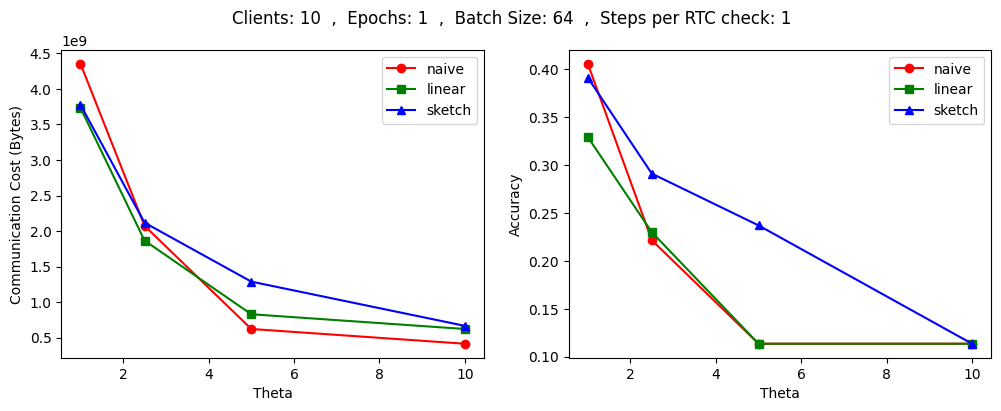

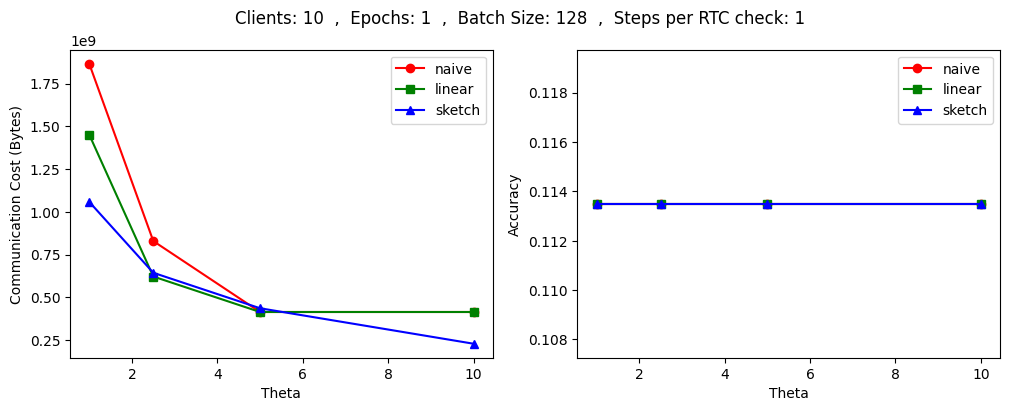

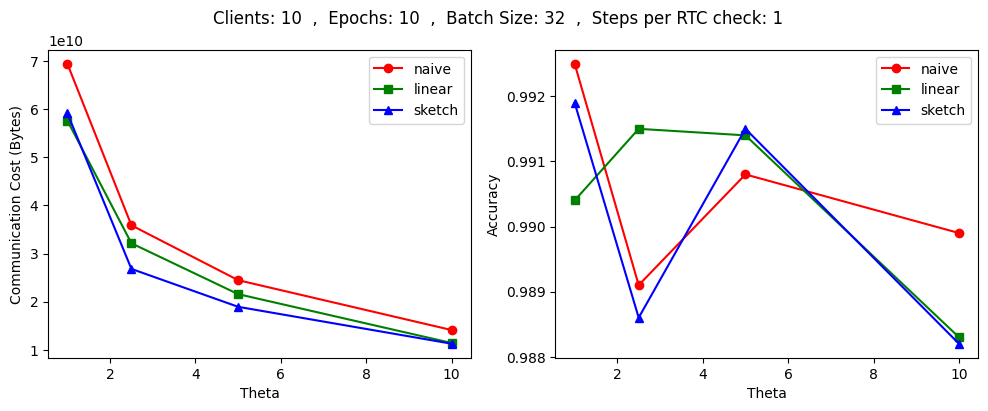

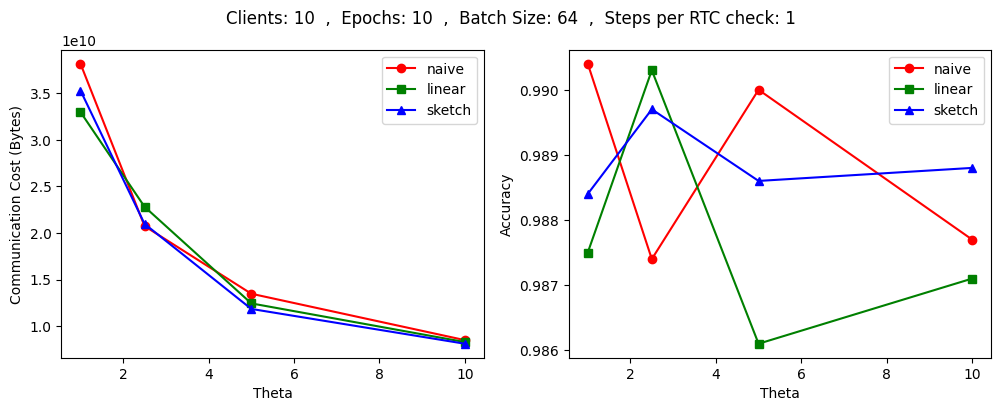

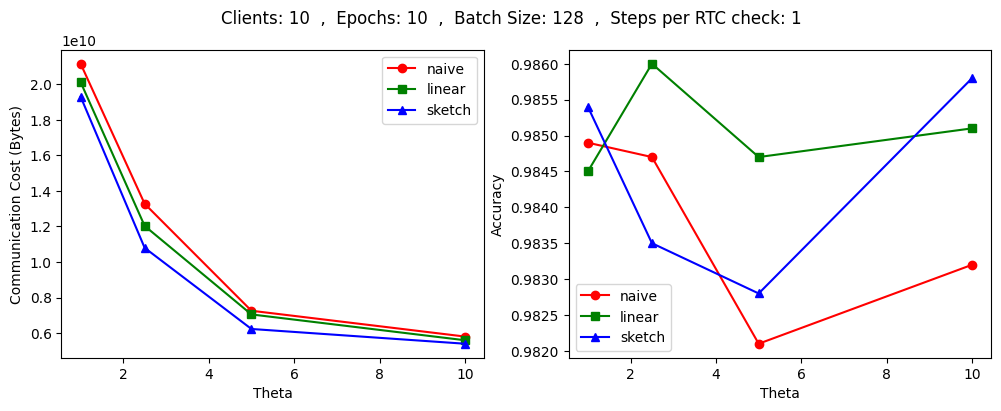

In [43]:
# Get unique values for each parameter
num_clients_values = df['num_clients'].unique()
batch_size_values = df['batch_size'].unique()
epochs_values = df['epochs'].unique()
steps_in_one_fda_step_values = df['steps_in_one_fda_step'].unique()
fda_names = df['fda_name'].unique()

# Loop through all unique combinations of num_clients, batch_size, epochs, and steps_in_one_fda_step
for num_clients in num_clients_values:
    for epochs in epochs_values:
        for batch_size in batch_size_values:
            for steps_in_one_fda_step in steps_in_one_fda_step_values:
                # Filter the data for the current combination
                filtered_data = df[(df['num_clients'] == num_clients) &
                                   (df['batch_size'] == batch_size) &
                                   (df['epochs'] == epochs) &
                                   (df['steps_in_one_fda_step'] == steps_in_one_fda_step)]

                # Create subplots
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

                # Plot the first graph (total_communication_bytes)
                for fda_name in filtered_data['fda_name'].unique():
                    fda_filtered_data = filtered_data[filtered_data['fda_name'] == fda_name]
                    ax1.plot(fda_filtered_data['theta'], fda_filtered_data['total_communication_bytes'],
                             fda_styles[fda_name], label=fda_name)

                ax1.set_xlabel('Theta')
                ax1.set_ylabel('Communication Cost (Bytes)')
                ax1.legend()

                # Plot the second graph (final_accuracy)
                for fda_name in filtered_data['fda_name'].unique():
                    fda_filtered_data = filtered_data[filtered_data['fda_name'] == fda_name]
                    ax2.plot(fda_filtered_data['theta'], fda_filtered_data['final_accuracy'],
                             fda_styles[fda_name], label=fda_name)

                # Add a single title for the entire figure
                title = f'Clients: {num_clients}  ,  Epochs: {epochs}  ,  Batch Size: {batch_size}  ,  Steps per RTC check: {steps_in_one_fda_step}'
                fig.suptitle(title)
                ax2.set_xlabel('Theta')
                ax2.set_ylabel('Accuracy')
                ax2.legend()

                # Show the plot
                plt.show()

# Batch Size plots

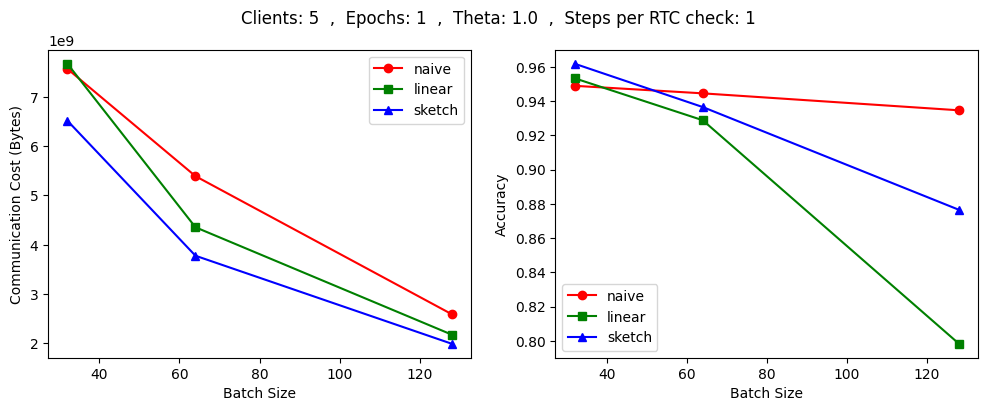

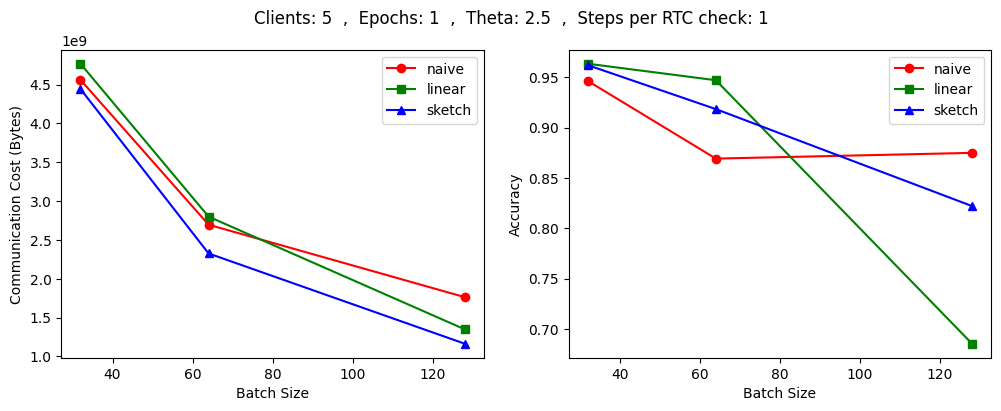

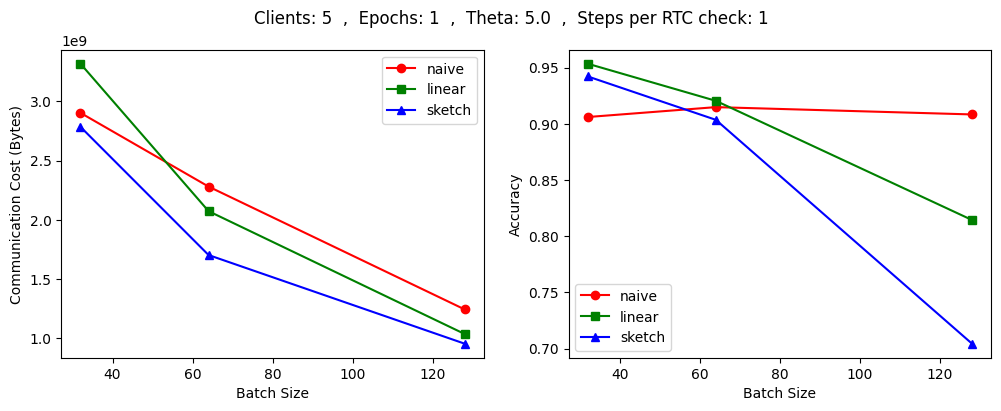

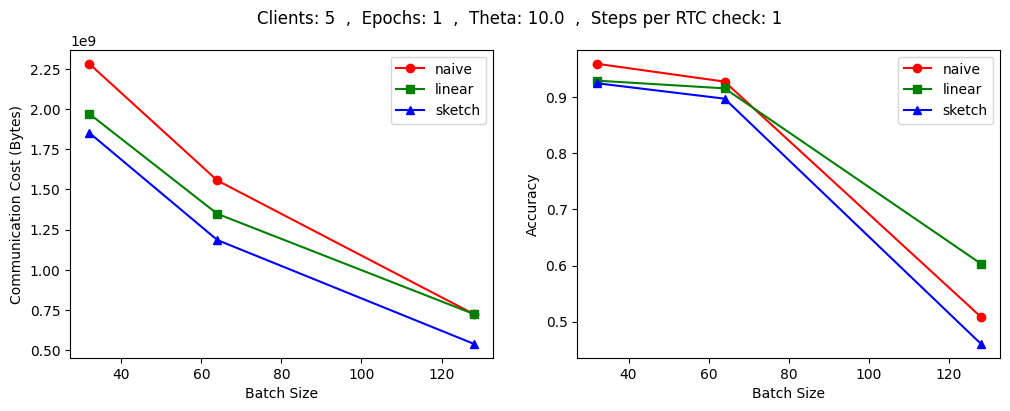

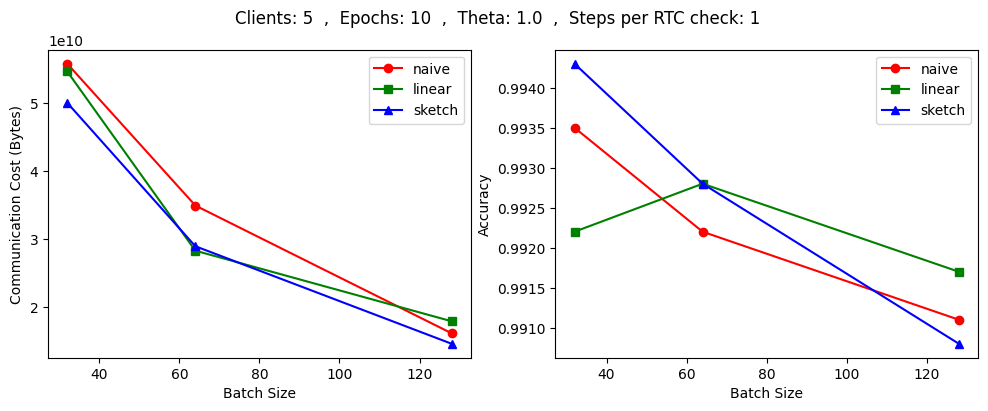

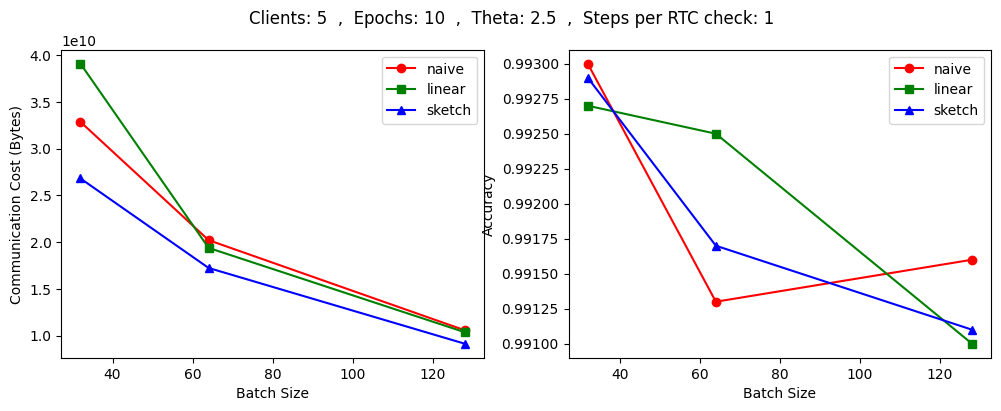

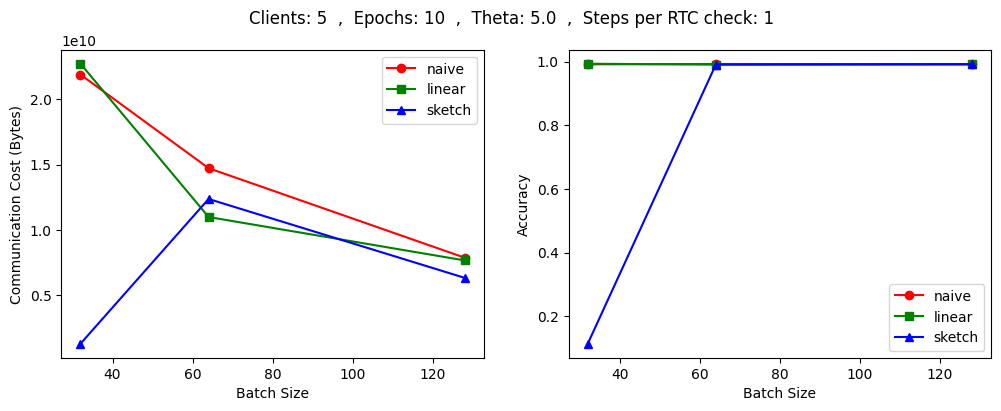

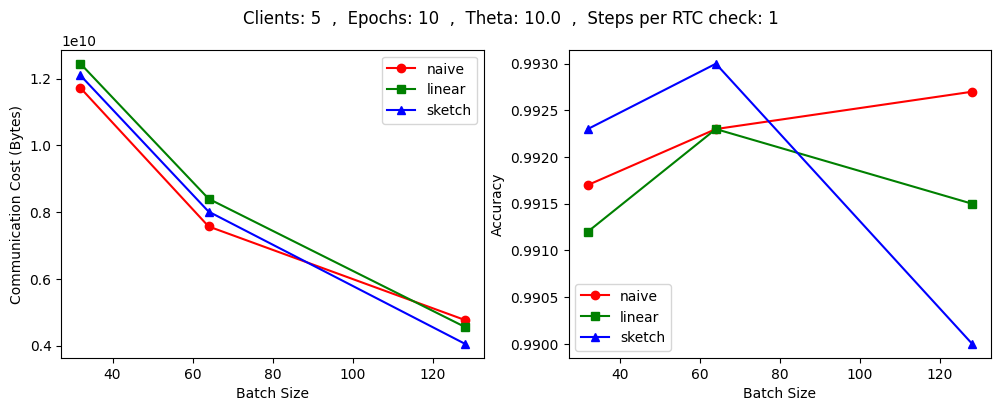

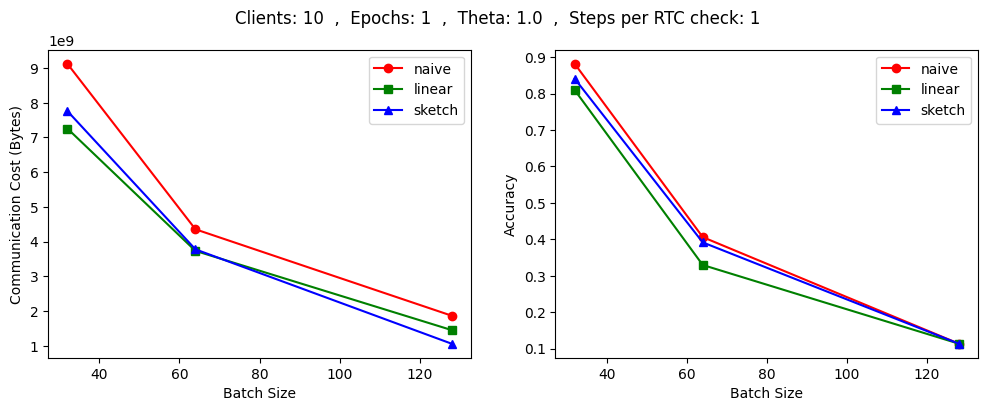

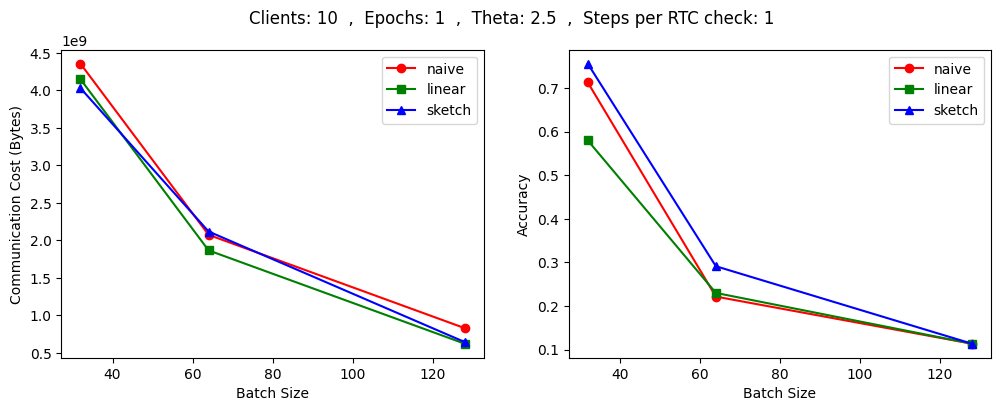

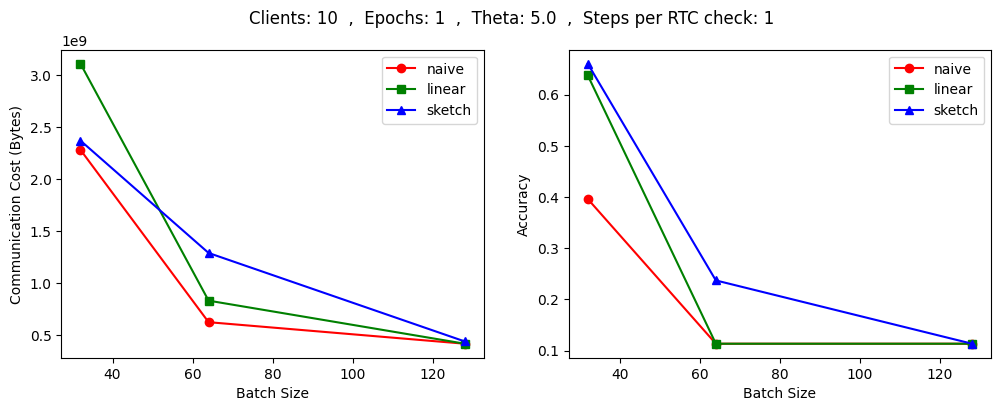

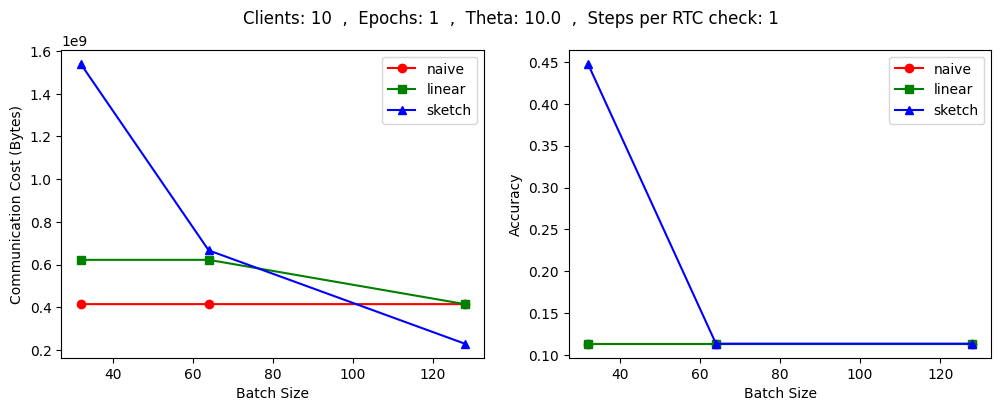

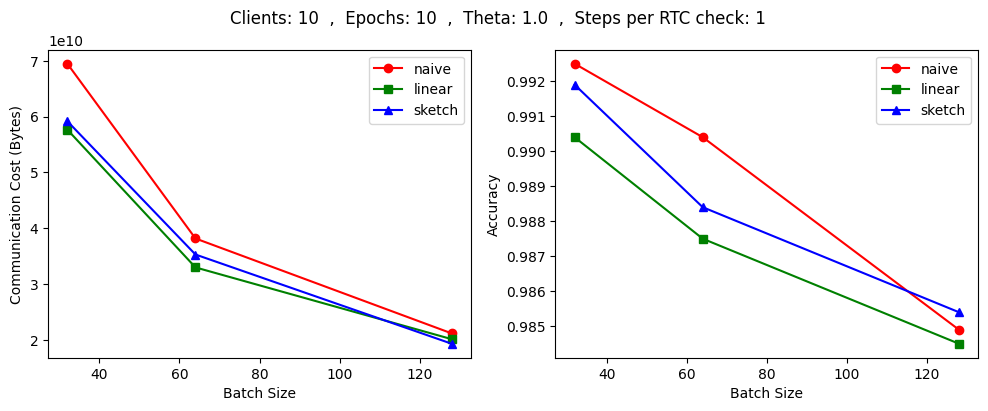

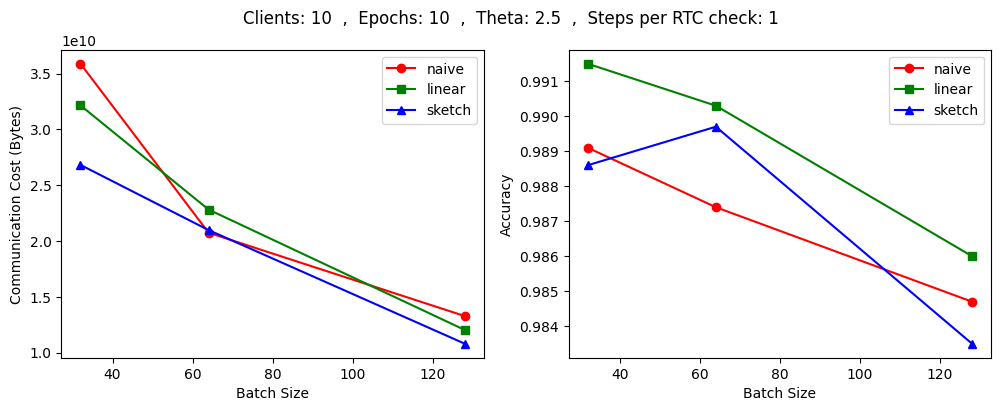

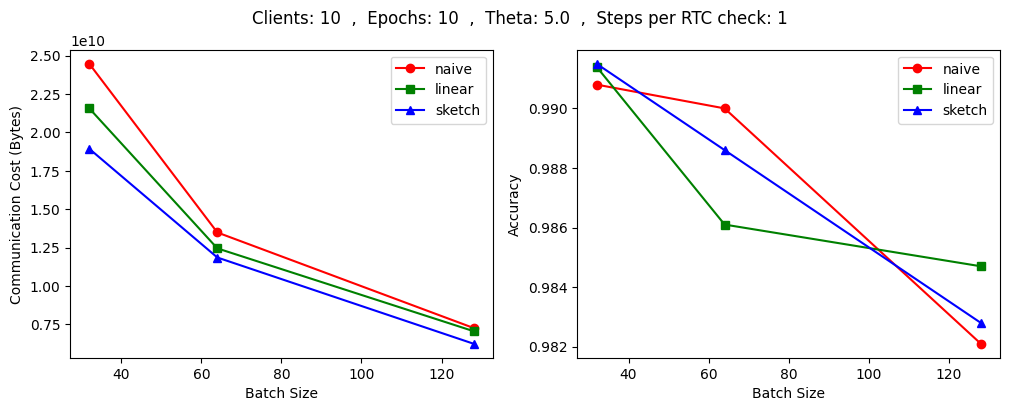

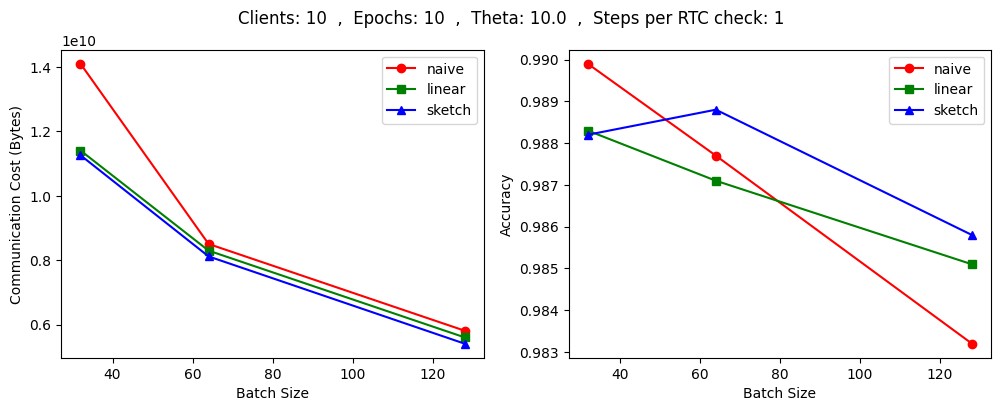

In [44]:
# Get unique values for each parameter
num_clients_values = df['num_clients'].unique()
theta_values = df['theta'].unique()
epochs_values = df['epochs'].unique() 
steps_in_one_fda_step_values = df['steps_in_one_fda_step'].unique()
fda_names = df['fda_name'].unique()

# Loop through all unique combinations of num_clients, batch_size, epochs, and steps_in_one_fda_step
for num_clients in num_clients_values:
    for epochs in epochs_values:
        for theta in theta_values:
            for steps_in_one_fda_step in steps_in_one_fda_step_values:
                # Filter the data for the current combination
                filtered_data = df[(df['num_clients'] == num_clients) &
                                   (df['theta'] == theta) &
                                   (df['epochs'] == epochs) &
                                   (df['steps_in_one_fda_step'] == steps_in_one_fda_step)]

                # Create subplots
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

                # Plot the first graph (total_communication_bytes)
                for fda_name in filtered_data['fda_name'].unique():
                    fda_filtered_data = filtered_data[filtered_data['fda_name'] == fda_name]
                    ax1.plot(fda_filtered_data['batch_size'], fda_filtered_data['total_communication_bytes'],
                             fda_styles[fda_name], label=fda_name)

                ax1.set_xlabel('Batch Size')
                ax1.set_ylabel('Communication Cost (Bytes)')
                ax1.legend()

                # Plot the second graph (final_accuracy)
                for fda_name in filtered_data['fda_name'].unique():
                    fda_filtered_data = filtered_data[filtered_data['fda_name'] == fda_name]
                    ax2.plot(fda_filtered_data['batch_size'], fda_filtered_data['final_accuracy'],
                             fda_styles[fda_name], label=fda_name)

                # Add a single title for the entire figure
                title = f'Clients: {num_clients}  ,  Epochs: {epochs}  ,  Theta: {theta}  ,  Steps per RTC check: {steps_in_one_fda_step}'
                fig.suptitle(title)
                ax2.set_xlabel('Batch Size')
                ax2.set_ylabel('Accuracy')
                ax2.legend()

                # Show the plot
                plt.show()

# Accuracy / comm cost for everything

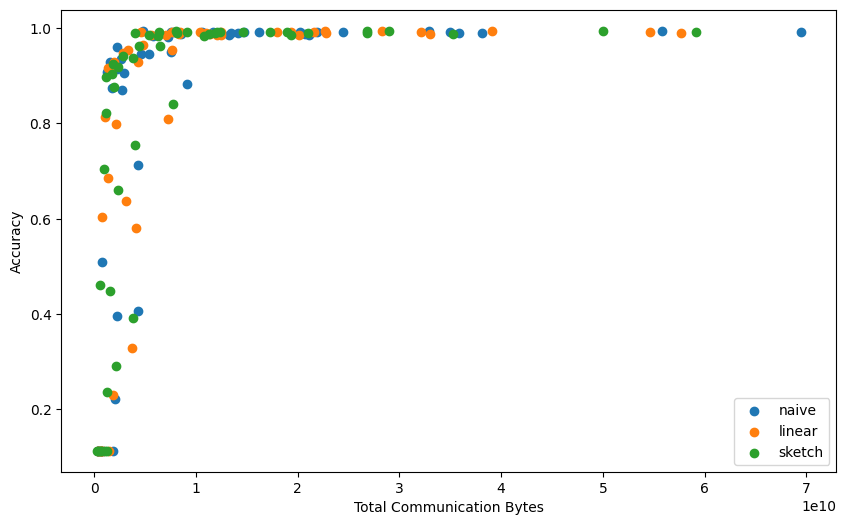

In [52]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data points for each method (fda_name)
for fda_name in fda_names:
    fda_filtered_data = df[df['fda_name'] == fda_name]
    plt.scatter(fda_filtered_data['total_communication_bytes'], fda_filtered_data['final_accuracy'],
                label=fda_name)

plt.xlabel('Total Communication Bytes')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Save All plots as PDF in `.eps` format

In [57]:
from matplotlib.backends.backend_pdf import PdfPages

# Get unique values for each parameter
num_clients_values = df['num_clients'].unique()
theta_values = df['theta'].unique()
epochs_values = df['epochs'].unique() 
batch_size_values = df['batch_size'].unique()
steps_in_one_fda_step_values = df['steps_in_one_fda_step'].unique()
fda_names = df['fda_name'].unique()

output_file = "cloud_results/PDF/CNN/all_plots.pdf"
with PdfPages(output_file) as pdf:
    
    # client plots
    
    # Loop through all unique combinations of num_clients, batch_size, epochs, and steps_in_one_fda_step
    for theta in theta_values:
        for epochs in epochs_values:
            for batch_size in batch_size_values:
                for steps_in_one_fda_step in steps_in_one_fda_step_values:
                    # Filter the data for the current combination
                    filtered_data = df[(df['theta'] == theta) &
                                       (df['batch_size'] == batch_size) &
                                       (df['epochs'] == epochs) &
                                       (df['steps_in_one_fda_step'] == steps_in_one_fda_step)]

                    # Create subplots
                    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

                    # Plot the first graph (total_communication_bytes)
                    for fda_name in filtered_data['fda_name'].unique():
                        fda_filtered_data = filtered_data[filtered_data['fda_name'] == fda_name]
                        ax1.plot(fda_filtered_data['num_clients'], fda_filtered_data['total_communication_bytes'],
                                 fda_styles[fda_name], label=fda_name)

                    ax1.set_xlabel('Number of Clients')
                    ax1.set_ylabel('Communication Cost (Bytes)')
                    ax1.legend()

                    # Plot the second graph (final_accuracy)
                    for fda_name in filtered_data['fda_name'].unique():
                        fda_filtered_data = filtered_data[filtered_data['fda_name'] == fda_name]
                        ax2.plot(fda_filtered_data['num_clients'], fda_filtered_data['final_accuracy'],
                                 fda_styles[fda_name], label=fda_name)

                    # Add a single title for the entire figure
                    title = f'Theta: {theta}  ,  Epochs: {epochs}  ,  Batch Size: {batch_size}  ,  Steps per RTC check: {steps_in_one_fda_step}'
                    fig.suptitle(title)
                    ax2.set_xlabel('Number of Clients')
                    ax2.set_ylabel('Accuracy')
                    ax2.legend()

                    # Close the current figure to prevent it from being displayed in the notebook
                    plt.close(fig)
                    
                    pdf.savefig(fig)
    
    
    # theta plots
    
    # Loop through all unique combinations of num_clients, batch_size, epochs, and steps_in_one_fda_step
    for num_clients in num_clients_values:
        for epochs in epochs_values:
            for batch_size in batch_size_values:
                for steps_in_one_fda_step in steps_in_one_fda_step_values:
                    # Filter the data for the current combination
                    filtered_data = df[(df['num_clients'] == num_clients) &
                                       (df['batch_size'] == batch_size) &
                                       (df['epochs'] == epochs) &
                                       (df['steps_in_one_fda_step'] == steps_in_one_fda_step)]

                    # Create subplots
                    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

                    # Plot the first graph (total_communication_bytes)
                    for fda_name in filtered_data['fda_name'].unique():
                        fda_filtered_data = filtered_data[filtered_data['fda_name'] == fda_name]
                        ax1.plot(fda_filtered_data['theta'], fda_filtered_data['total_communication_bytes'],
                                 fda_styles[fda_name], label=fda_name)

                    ax1.set_xlabel('Theta')
                    ax1.set_ylabel('Communication Cost (Bytes)')
                    ax1.legend()

                    # Plot the second graph (final_accuracy)
                    for fda_name in filtered_data['fda_name'].unique():
                        fda_filtered_data = filtered_data[filtered_data['fda_name'] == fda_name]
                        ax2.plot(fda_filtered_data['theta'], fda_filtered_data['final_accuracy'],
                                 fda_styles[fda_name], label=fda_name)

                    # Add a single title for the entire figure
                    title = f'Clients: {num_clients}  ,  Epochs: {epochs}  ,  Batch Size: {batch_size}  ,  Steps per RTC check: {steps_in_one_fda_step}'
                    fig.suptitle(title)
                    ax2.set_xlabel('Theta')
                    ax2.set_ylabel('Accuracy')
                    ax2.legend()
                    
                    # Close the current figure to prevent it from being displayed in the notebook
                    plt.close(fig)
                    
                    pdf.savefig(fig)
                    

    # Loop through all unique combinations of num_clients, batch_size, epochs, and steps_in_one_fda_step
    for num_clients in num_clients_values:
        for epochs in epochs_values:
            for theta in theta_values:
                for steps_in_one_fda_step in steps_in_one_fda_step_values:
                    # Filter the data for the current combination
                    filtered_data = df[(df['num_clients'] == num_clients) &
                                       (df['theta'] == theta) &
                                       (df['epochs'] == epochs) &
                                       (df['steps_in_one_fda_step'] == steps_in_one_fda_step)]

                    # Create subplots
                    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

                    # Plot the first graph (total_communication_bytes)
                    for fda_name in filtered_data['fda_name'].unique():
                        fda_filtered_data = filtered_data[filtered_data['fda_name'] == fda_name]
                        ax1.plot(fda_filtered_data['batch_size'], fda_filtered_data['total_communication_bytes'],
                                 fda_styles[fda_name], label=fda_name)

                    ax1.set_xlabel('Batch Size')
                    ax1.set_ylabel('Communication Cost (Bytes)')
                    ax1.legend()

                    # Plot the second graph (final_accuracy)
                    for fda_name in filtered_data['fda_name'].unique():
                        fda_filtered_data = filtered_data[filtered_data['fda_name'] == fda_name]
                        ax2.plot(fda_filtered_data['batch_size'], fda_filtered_data['final_accuracy'],
                                 fda_styles[fda_name], label=fda_name)

                    # Add a single title for the entire figure
                    title = f'Clients: {num_clients}  ,  Epochs: {epochs}  ,  Theta: {theta}  ,  Steps per RTC check: {steps_in_one_fda_step}'
                    fig.suptitle(title)
                    ax2.set_xlabel('Batch Size')
                    ax2.set_ylabel('Accuracy')
                    ax2.legend()
                    
                    # Close the current figure to prevent it from being displayed in the notebook
                    plt.close(fig)

                    pdf.savefig(fig)
                    
    # EVERYTHING: COMM COST/ACC
    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the data points for each method (fda_name)
    for fda_name in fda_names:
        fda_filtered_data = df[df['fda_name'] == fda_name]
        plt.scatter(fda_filtered_data['total_communication_bytes'], fda_filtered_data['final_accuracy'],
                    label=fda_name)

    plt.xlabel('Total Communication Bytes')
    plt.ylabel('Accuracy')
    plt.legend()

    # Save the plot to the PDF file
    pdf.savefig()
    plt.close()
    

In [58]:
df.to_csv("cloud_results/CNN/advanced_cnn.csv")